In [ ]:
!pip install geopandas
!pip install geopy

In [3]:
import geopy
geopy.geocoders.SERVICE_TO_GEOCODER

{'algolia': geopy.geocoders.algolia.AlgoliaPlaces,
 'arcgis': geopy.geocoders.arcgis.ArcGIS,
 'azure': geopy.geocoders.azure.AzureMaps,
 'baidu': geopy.geocoders.baidu.Baidu,
 'baiduv3': geopy.geocoders.baidu.BaiduV3,
 'banfrance': geopy.geocoders.banfrance.BANFrance,
 'bing': geopy.geocoders.bing.Bing,
 'databc': geopy.geocoders.databc.DataBC,
 'geocodeearth': geopy.geocoders.geocodeearth.GeocodeEarth,
 'geocodefarm': geopy.geocoders.geocodefarm.GeocodeFarm,
 'geonames': geopy.geocoders.geonames.GeoNames,
 'google': geopy.geocoders.googlev3.GoogleV3,
 'googlev3': geopy.geocoders.googlev3.GoogleV3,
 'geolake': geopy.geocoders.geolake.Geolake,
 'here': geopy.geocoders.here.Here,
 'ignfrance': geopy.geocoders.ignfrance.IGNFrance,
 'mapbox': geopy.geocoders.mapbox.MapBox,
 'mapquest': geopy.geocoders.mapquest.MapQuest,
 'maptiler': geopy.geocoders.maptiler.MapTiler,
 'nominatim': geopy.geocoders.nominatim.Nominatim,
 'opencage': geopy.geocoders.opencage.OpenCage,
 'openmapquest': geopy.ge

In [4]:
import geopandas as gpd

toponym_dict = {'toponym':['Hamburg','New York','Kairo','Aberdeen']}

gdf = gpd.GeoDataFrame(toponym_dict)

gdf

,toponym
0,Hamburg
1,New York
2,Kairo
3,Aberdeen


In [15]:
from geopandas.tools import geocode
from geopy import geocoders

geocoders.options.default_user_agent = "my-application"
 
gdf[['geometry', 'adress']] = geocode(gdf.toponym)

gdf

,toponym,geometry,adress
0,Hamburg,POINT (9.99247 53.55334),"Hamburg, Hamburg, Germany, Germany"
1,New York,POINT (-74.00723 40.71305),"New York, NY, United States"
2,Kairo,POINT (31.23529 30.04349),"Cairo, Egypt, Egypt"
3,Aberdeen,POINT (-2.09540 57.14748),"Aberdeen, Aberdeen City, United Kingdom, Unite..."


<AxesSubplot:>

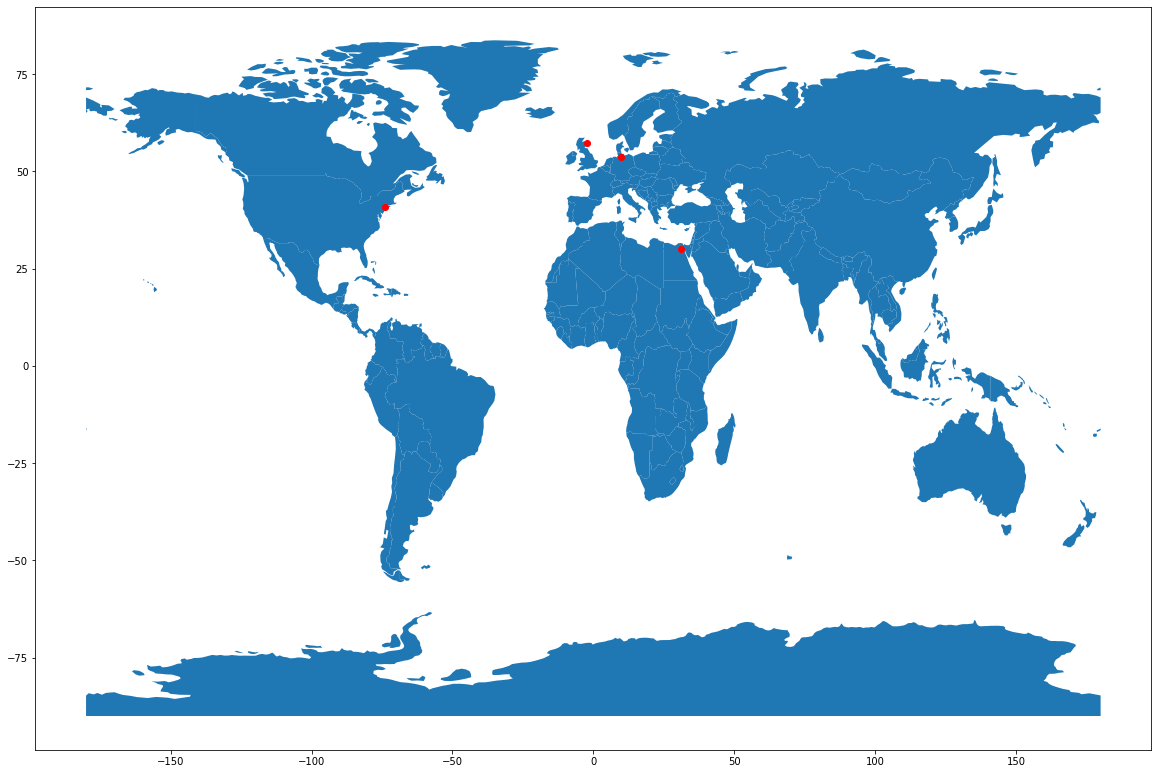

In [16]:
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots(figsize=[20,25])
 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax)
 
gdf.plot(ax=ax, color="red")